# Diabetes Prediction

In this notebook, some features that may cause diabetes are given.

The following steps are applied in the project in order:

1.  The dataset is imported.

2.  It is observed whether there is missing data in the dataset and then necessary arrangements have been made.

3. Various query operations have been applied to obtain information about the structure of the data.

4. Statistical (descriptive) analysis and then visualization of the data were made for better understanding before modeling.

5. Outliers of the data have been removed.

6. The dimensionality reduction has been made for better prediction.

7. The dataset is divided into train and test.

8. Machine learning models were created and model success was determined.


# 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import confusion_matrix , accuracy_score


In [2]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

# 2

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.shape

(768, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

As seen above, there is no missing data.

However, instead of entering observations as missing for some data, the value was entered as 0.

Below this situation has been observed and the problem has been fixed.

In [9]:
data[data["Glucose"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [10]:
data[data["BloodPressure"]==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [11]:
data[data["SkinThickness"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [12]:
data[data["Insulin"]==0].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


In [13]:
data[data["BMI"]==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [14]:
data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].eq(0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [15]:
dt2=data[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
dt1=data[["Pregnancies","DiabetesPedigreeFunction","Age","Outcome"]]
dt=pd.concat([dt2, dt1], axis=1)
dt

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.0,NaN,33.6,6,0.627,50,1
1,85.0,66.0,29.0,NaN,26.6,1,0.351,31,0
2,183.0,64.0,NaN,NaN,23.3,8,0.672,32,1
3,89.0,66.0,23.0,94.0,28.1,1,0.167,21,0
4,137.0,40.0,35.0,168.0,43.1,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9,10,0.171,63,0
764,122.0,70.0,27.0,NaN,36.8,2,0.340,27,0
765,121.0,72.0,23.0,112.0,26.2,5,0.245,30,0
766,126.0,60.0,NaN,NaN,30.1,1,0.349,47,1


In [16]:
dt.isnull().sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [17]:
dt.fillna(dt.mean(),inplace=True)

In [18]:
dt

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.00000,155.548223,33.6,6,0.627,50,1
1,85.0,66.0,29.00000,155.548223,26.6,1,0.351,31,0
2,183.0,64.0,29.15342,155.548223,23.3,8,0.672,32,1
3,89.0,66.0,23.00000,94.000000,28.1,1,0.167,21,0
4,137.0,40.0,35.00000,168.000000,43.1,0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,10,0.171,63,0
764,122.0,70.0,27.00000,155.548223,36.8,2,0.340,27,0
765,121.0,72.0,23.00000,112.000000,26.2,5,0.245,30,0
766,126.0,60.0,29.15342,155.548223,30.1,1,0.349,47,1


In [19]:
dt.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
Pregnancies                 0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3

In [20]:
dt.at[444,"BloodPressure"]

62.0

In [21]:
dt.iat[444,1]

62.0

In [22]:
dt.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [23]:
dt.loc[[444]]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
444,117.0,62.0,12.0,155.548223,29.7,4,0.38,30,1


In [24]:
dt.loc[[444,445,446]]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
444,117.0,62.0,12.0,155.548223,29.7,4,0.380,30,1
445,180.0,78.0,63.0,14.000000,59.4,0,2.420,25,1
446,100.0,72.0,12.0,70.000000,25.3,1,0.658,28,0


In [25]:
dt.iloc[[444, 445], [1, 3]]

,BloodPressure,Insulin
444,62.0,155.548223
445,78.0,14.000000


In [26]:
dt[["Age"]].isin([23]).head(5)

,Age
0,False
1,False
2,False
3,False
4,False


In [27]:
dt[["Age"]]==23

,Age
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [28]:
dt.groupby(["Pregnancies"]).mean().head(5)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.000000,73.676143,30.674860,157.347784,35.167319,0.520838,27.603604,0.342342
1,115.452298,68.328927,27.892257,145.914646,31.372593,0.486496,27.370370,0.214815
2,110.796117,68.173168,28.111929,144.741560,31.213737,0.491660,27.194175,0.184466
3,123.586667,69.482874,27.076821,149.672623,30.858100,0.432147,29.026667,0.360000
4,125.117647,73.223758,27.457975,163.227605,32.141176,0.446353,32.779412,0.338235


In [29]:
dt.groupby(["Glucose"]).mean()

,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
Glucose,,,,,,,,
44.0,62.000000,29.153420,155.548223,25.000000,5.000000,0.587000,36.000000,0.00
56.0,56.000000,28.000000,45.000000,24.200000,2.000000,0.332000,22.000000,0.00
57.0,70.000000,33.076710,155.548223,27.250000,4.500000,0.415500,54.000000,0.00
61.0,82.000000,28.000000,155.548223,34.400000,3.000000,0.243000,46.000000,0.00
62.0,78.000000,29.153420,155.548223,32.600000,7.000000,0.391000,41.000000,0.00
...,...,...,...,...,...,...,...,...
195.0,70.000000,31.076710,150.274112,28.000000,6.500000,0.245500,43.000000,1.00
196.0,80.666667,31.384473,228.182741,37.933333,5.333333,0.643667,42.333333,1.00
197.0,71.000000,53.038355,399.524112,31.950000,4.000000,1.063250,46.250000,0.75


In [30]:
dt.nunique()

Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
Pregnancies                  17
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [31]:
dt.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [32]:
dt.duplicated().sum()

0

In [33]:
dt.filter(items=['Pregnancies', 'Outcome'])

,Pregnancies,Outcome
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


In [34]:
dt['BloodPressure'].sample(n=3, random_state=1)

285    74.0
101    60.0
581    60.0
Name: BloodPressure, dtype: float64

In [35]:
dt['BloodPressure'].sample(n=10, random_state=1)

285    74.0
101    60.0
581    60.0
352    82.0
726    78.0
472    66.0
233    68.0
385    54.0
556    70.0
59     64.0
Name: BloodPressure, dtype: float64

In [36]:
dt['BloodPressure'].sample(n=20, random_state=1).mean()

70.62025920873124

In [37]:
dt.set_index('Insulin')

,Glucose,BloodPressure,SkinThickness,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
Insulin,,,,,,,,
155.548223,148.0,72.0,35.00000,33.6,6,0.627,50,1
155.548223,85.0,66.0,29.00000,26.6,1,0.351,31,0
155.548223,183.0,64.0,29.15342,23.3,8,0.672,32,1
94.000000,89.0,66.0,23.00000,28.1,1,0.167,21,0
168.000000,137.0,40.0,35.00000,43.1,0,2.288,33,1
...,...,...,...,...,...,...,...,...
180.000000,101.0,76.0,48.00000,32.9,10,0.171,63,0
155.548223,122.0,70.0,27.00000,36.8,2,0.340,27,0
112.000000,121.0,72.0,23.00000,26.2,5,0.245,30,0


In [38]:
dt.take([1, 2], axis=1)

,BloodPressure,SkinThickness
0,72.0,35.00000
1,66.0,29.00000
2,64.0,29.15342
3,66.0,23.00000
4,40.0,35.00000
...,...,...
763,76.0,48.00000
764,70.0,27.00000
765,72.0,23.00000
766,60.0,29.15342


In [39]:
dt.nlargest(3, 'DiabetesPedigreeFunction')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
445,180.0,78.0,63.0,14.0,59.4,0,2.420,25,1
228,197.0,70.0,39.0,744.0,36.7,4,2.329,31,0
4,137.0,40.0,35.0,168.0,43.1,0,2.288,33,1


In [40]:
dt.nsmallest(3, 'DiabetesPedigreeFunction')

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
268,102.0,52.0,29.15342,155.548223,25.1,0,0.078,21,0
180,87.0,80.0,29.15342,155.548223,23.2,6,0.084,32,0
149,90.0,70.0,17.00000,155.548223,27.3,2,0.085,22,0


In [41]:
dt["Age"].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
52     8
44     8
50     8
51     8
58     7
54     6
47     6
53     5
60     5
49     5
57     5
48     5
66     4
62     4
63     4
55     4
59     3
56     3
65     3
67     3
61     2
69     2
64     1
68     1
70     1
72     1
81     1
Name: Age, dtype: int64

In [42]:
dt["BMI"].value_counts()

32.000000    13
31.600000    12
31.200000    12
32.457464    11
33.300000    10
             ..
26.700000     1
32.600000     1
28.100000     1
22.700000     1
42.200000     1
Name: BMI, Length: 248, dtype: int64

# 4

In [43]:
dscs = dt.describe().T
variances=pd.DataFrame(dt.var()).rename(columns={0: "variance"})
skewness=pd.DataFrame(dt.skew()).rename(columns={0: "skewness"})
kurtosiss=pd.DataFrame(dt.kurtosis()).rename(columns={0: "kurtosis"})
descriptive_statistics=pd.concat([dscs,variances,skewness,kurtosiss], axis=1)
descriptive_statistics

,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00,926.346983,0.532719,-0.259159
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00,146.321591,0.137305,1.097784
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00,77.280660,0.822173,5.414846
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00,7228.588766,3.019084,15.185233
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10,47.267706,0.598253,0.919490
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00,11.354056,0.901674,0.159220
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42,0.109779,1.919911,5.594954
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00,138.303046,1.129597,0.643159
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00,0.227483,0.635017,-1.600930


In [44]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.947131,9.214538,-4.390041,-28.555231,0.469774,-0.037426,21.570620,0.356618
Glucose,13.947131,1022.248314,94.430956,29.239183,1220.935799,55.726987,1.454875,99.082805,7.115079
BloodPressure,9.214538,94.430956,374.647271,64.029396,198.378412,43.004695,0.264638,54.523453,0.600697
SkinThickness,-4.390041,29.239183,64.029396,254.473245,802.979941,49.373869,0.972136,-21.381023,0.568747
Insulin,-28.555231,1220.935799,198.378412,802.979941,13281.180078,179.775172,7.066681,-57.143290,7.175671
BMI,0.469774,55.726987,43.004695,49.373869,179.775172,62.159984,0.367405,3.360330,1.100638
DiabetesPedigreeFunction,-0.037426,1.454875,0.264638,0.972136,7.066681,0.367405,0.109779,0.130772,0.027472
Age,21.570620,99.082805,54.523453,-21.381023,-57.143290,3.360330,0.130772,138.303046,1.336953
Outcome,0.356618,7.115079,0.600697,0.568747,7.175671,1.100638,0.027472,1.336953,0.227483


In [45]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

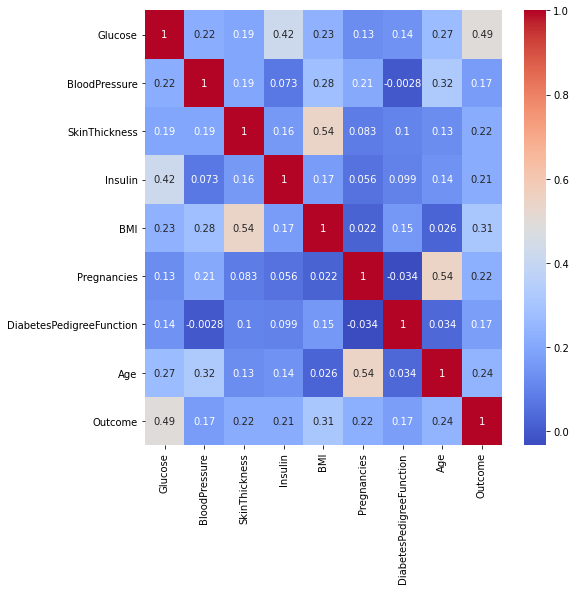

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(dt.corr() , annot=True , cmap="coolwarm")

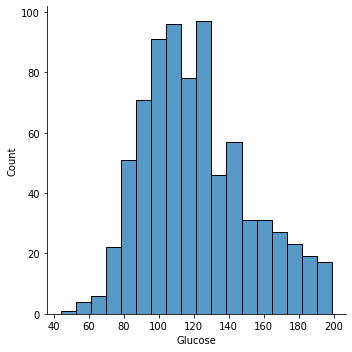

In [47]:
sns.displot(x="Glucose" , data=dt)

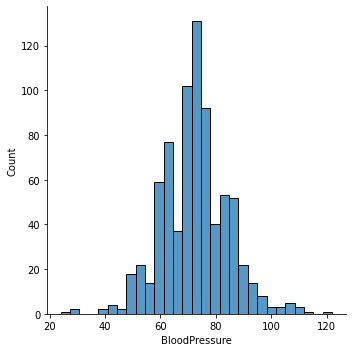

In [48]:
sns.displot(x="BloodPressure" , data=dt)

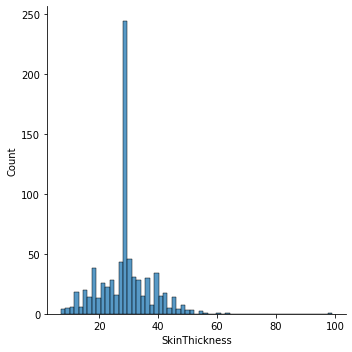

In [49]:
sns.displot(x="SkinThickness" , data=dt)

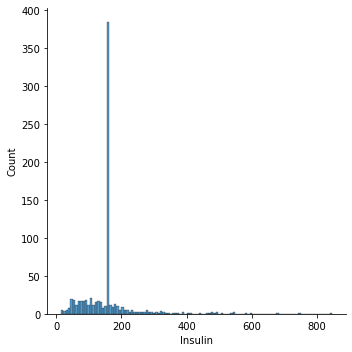

In [50]:
sns.displot(x="Insulin" , data=dt)

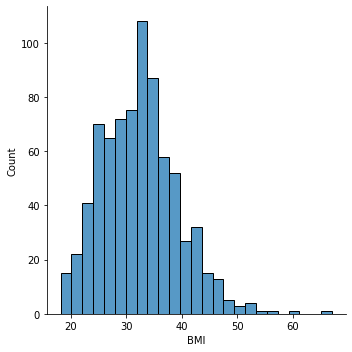

In [51]:
sns.displot(x="BMI" , data=dt)

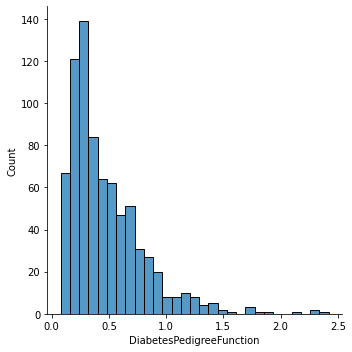

In [52]:
sns.displot(x="DiabetesPedigreeFunction" , data=dt)

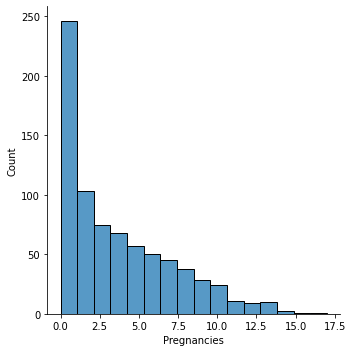

In [53]:
sns.displot(x="Pregnancies" , data=dt )

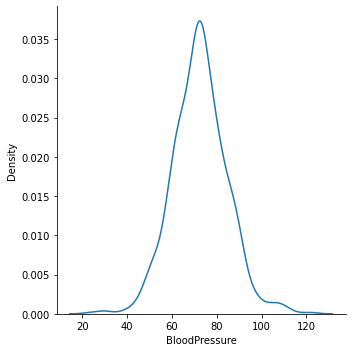

In [54]:
sns.displot(x="BloodPressure" , data=dt, kind="kde")

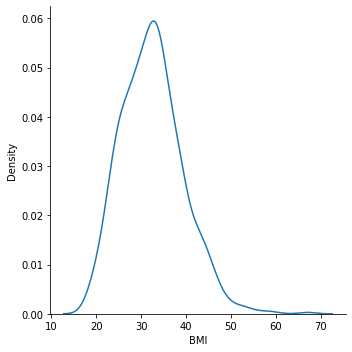

In [55]:
sns.displot(x="BMI" , data=dt, kind="kde")

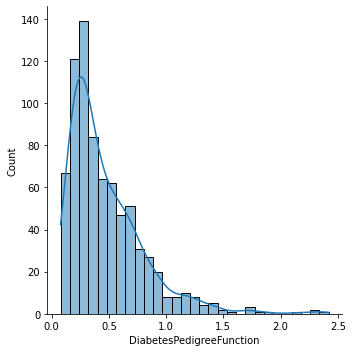

In [56]:
sns.displot(x="DiabetesPedigreeFunction" , data=dt , kde=True)

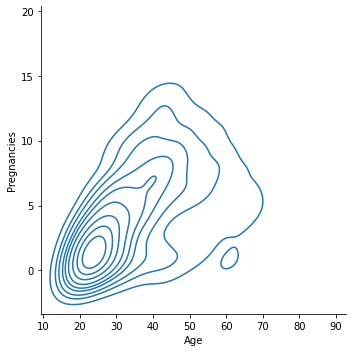

In [57]:
sns.displot(x="Age" , y="Pregnancies" , data=dt , kind="kde")

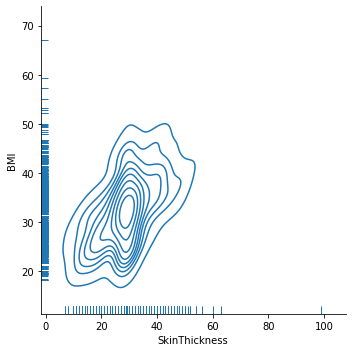

In [58]:
sns.displot(x="SkinThickness" , y="BMI" , data=dt , kind="kde" , rug=True)

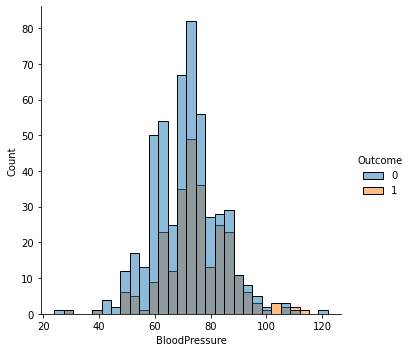

In [59]:
sns.displot(x="BloodPressure" , data=dt , hue="Outcome");

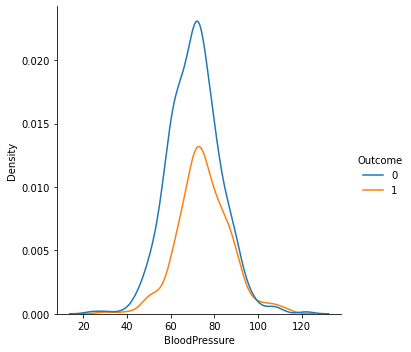

In [60]:
sns.displot(x="BloodPressure" , data=dt , kind="kde" , hue="Outcome")

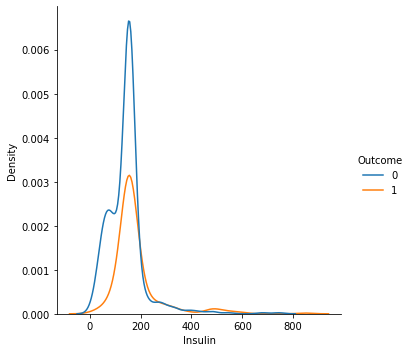

In [61]:
sns.displot(x="Insulin" , data=dt , kind="kde" , hue="Outcome" )

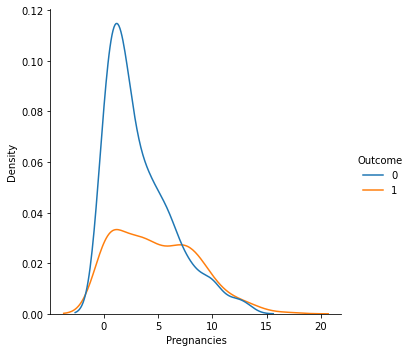

In [62]:
sns.displot(x="Pregnancies" , data=dt , kind="kde" , hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Count'>

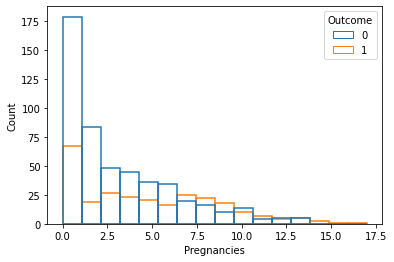

In [63]:
sns.histplot(data=dt , x="Pregnancies" , hue="Outcome" , fill=False)

<AxesSubplot:xlabel='BMI', ylabel='Density'>

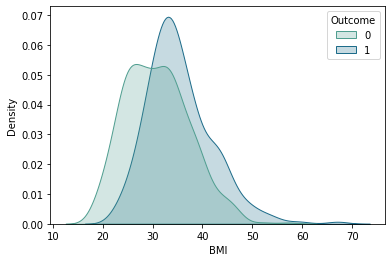

In [64]:
sns.kdeplot(data=dt , x="BMI", hue="Outcome" , fill=True, common_norm=False, palette="crest")

<AxesSubplot:xlabel='BMI'>

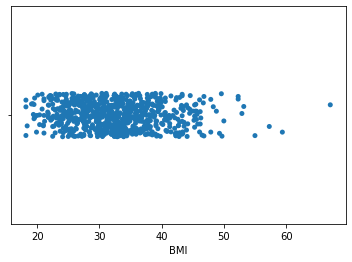

In [65]:
sns.stripplot(x=dt["BMI"])

<AxesSubplot:xlabel='Insulin'>

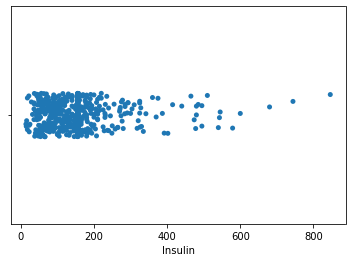

In [66]:
sns.stripplot(x=dt["Insulin"])

<AxesSubplot:xlabel='BMI'>

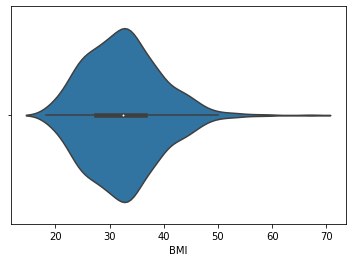

In [67]:
sns.violinplot(data=dt , x="BMI")

<AxesSubplot:xlabel='BloodPressure'>

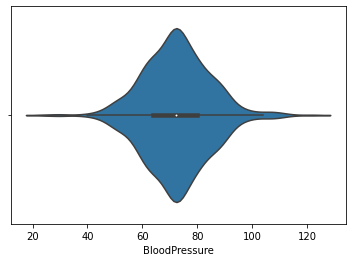

In [68]:
sns.violinplot(x="BloodPressure" , data=dt)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

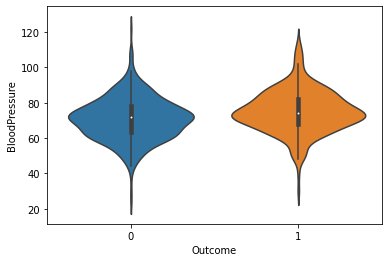

In [69]:
sns.violinplot(y="BloodPressure" , x="Outcome", data=dt)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

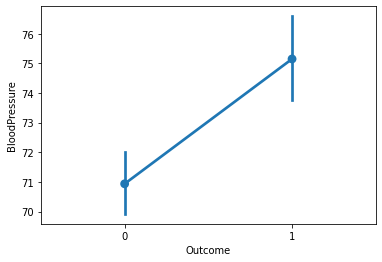

In [70]:
sns.pointplot(y="BloodPressure" , x="Outcome", data=dt)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

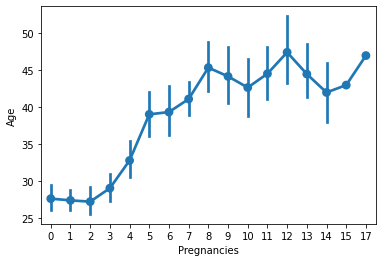

In [71]:
sns.pointplot(x="Pregnancies" , y="Age", data=dt)

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

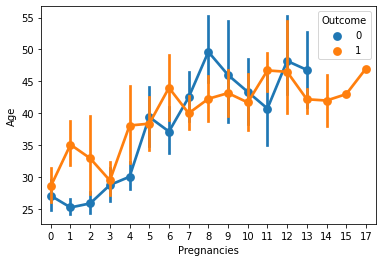

In [72]:
sns.pointplot(x="Pregnancies" , y="Age", data=dt, hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Age'>

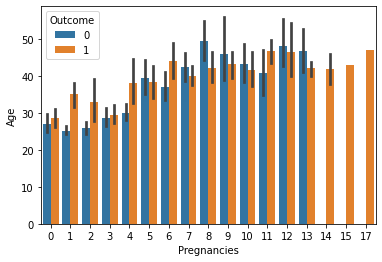

In [73]:
sns.barplot(x="Pregnancies", y="Age", hue="Outcome", data=dt)

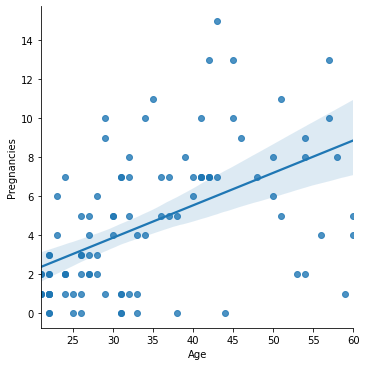

In [74]:
sns.lmplot(data=dt.head(100) , x="Age" , y="Pregnancies")

<AxesSubplot:xlabel='SkinThickness', ylabel='BMI'>

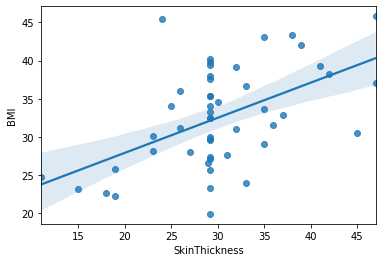

In [75]:
sns.regplot(data=dt.head(50) , x="SkinThickness" , y="BMI" )

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

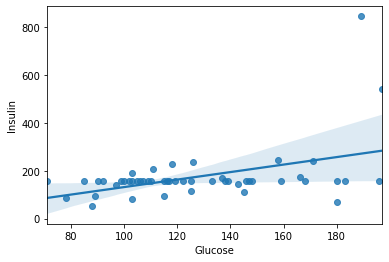

In [76]:
sns.regplot(data=dt.head(50) , x="Glucose" , y="Insulin" )

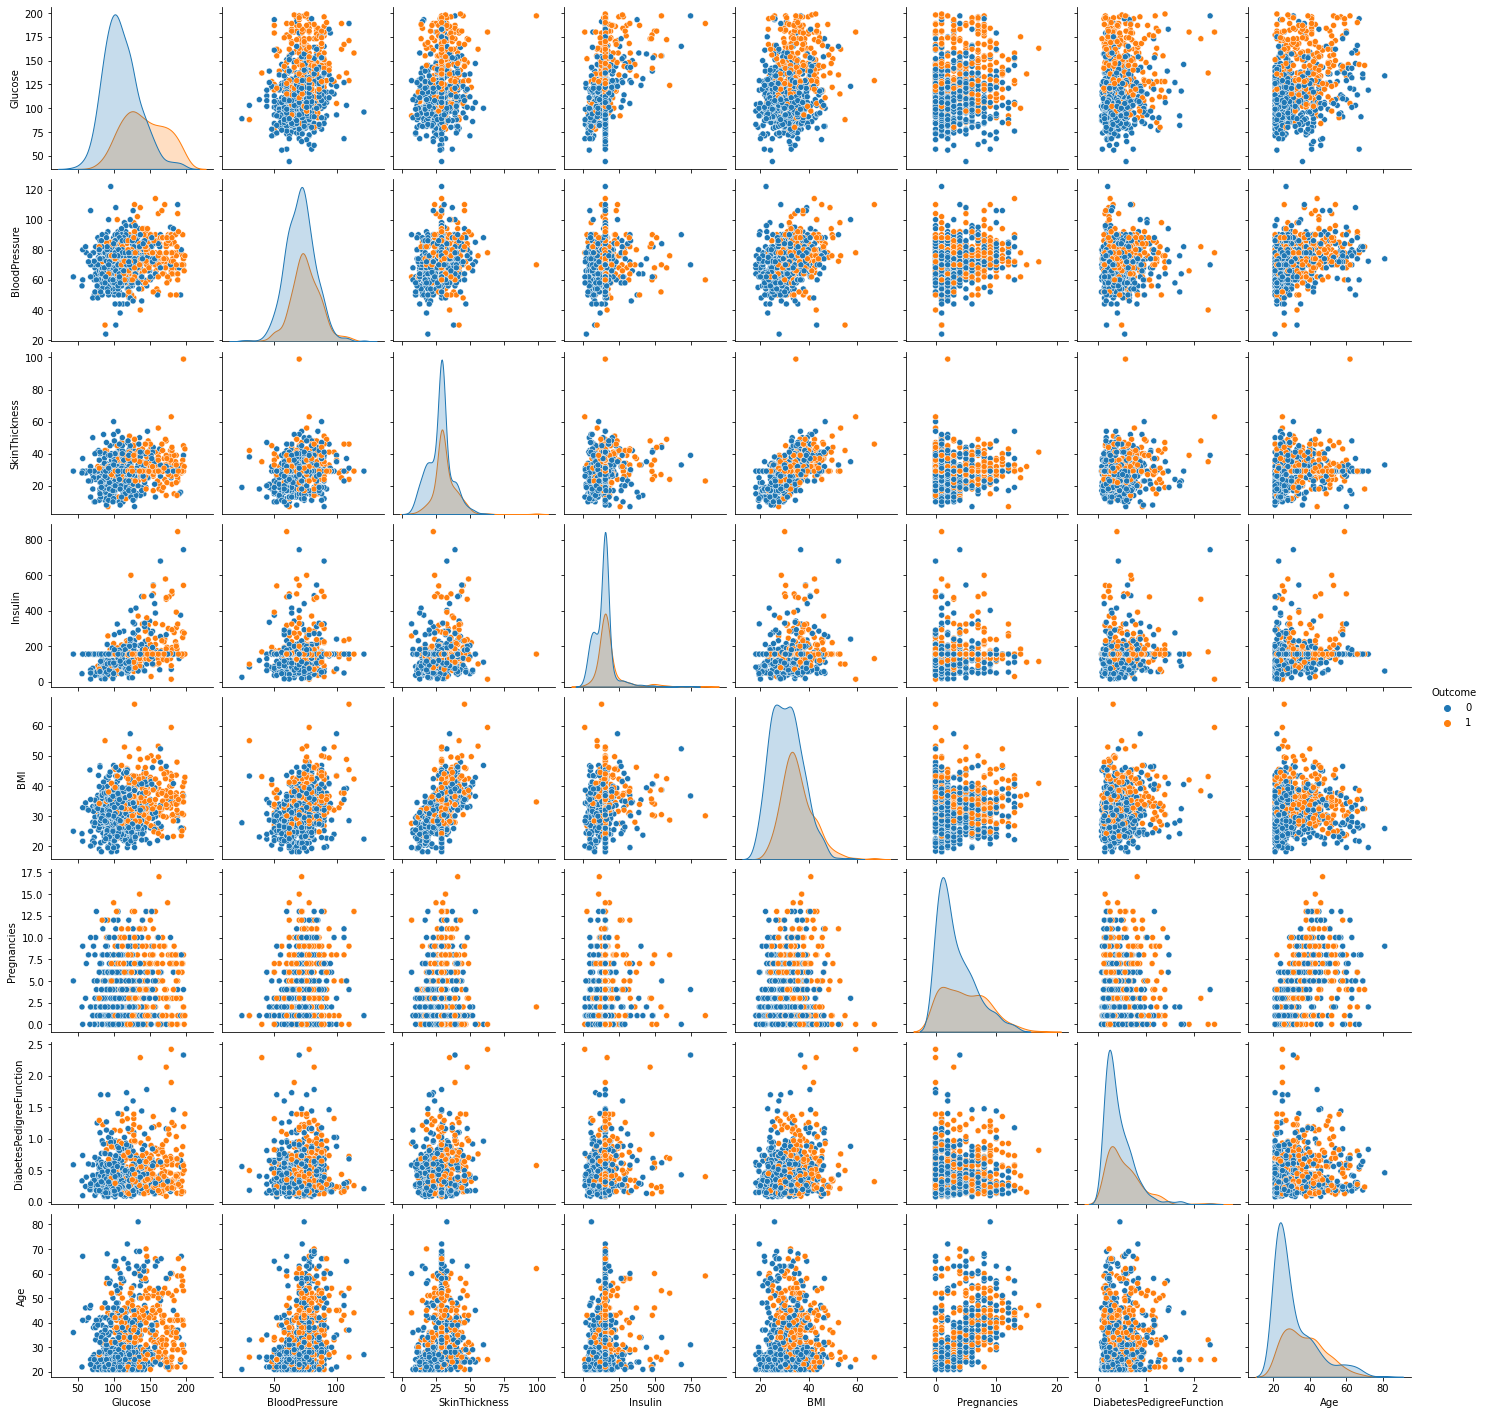

In [77]:
sns.pairplot(data=dt , hue="Outcome")

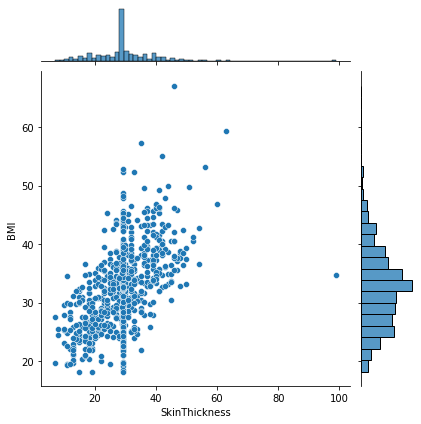

In [78]:
sns.jointplot(data=dt , x="SkinThickness" , y="BMI")

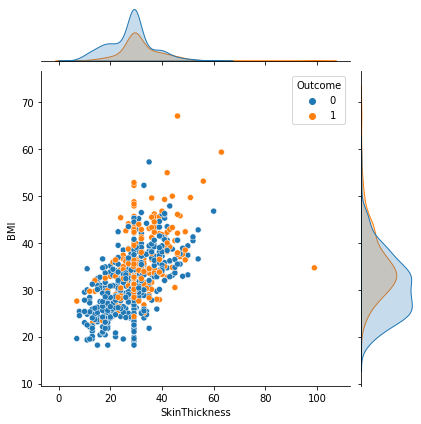

In [79]:
sns.jointplot(data=dt , x="SkinThickness" , y="BMI" , hue="Outcome")

# 5

<AxesSubplot:xlabel='Glucose'>

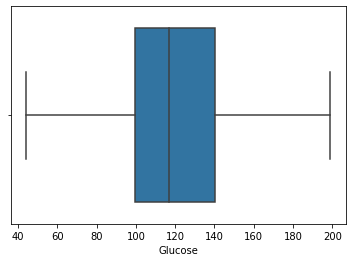

In [80]:
sns.boxplot(x=dt["Glucose"])

<AxesSubplot:xlabel='BloodPressure'>

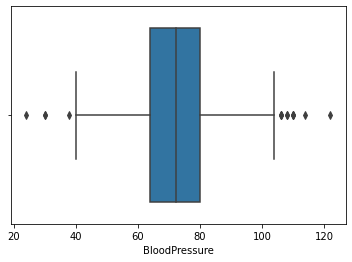

In [81]:
sns.boxplot(x=dt["BloodPressure"])

<AxesSubplot:xlabel='SkinThickness'>

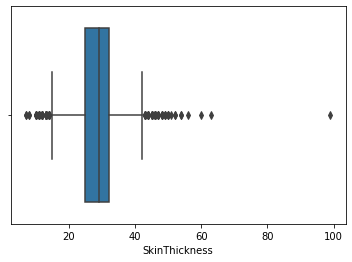

In [82]:
sns.boxplot(x=dt["SkinThickness"])

<AxesSubplot:xlabel='Insulin'>

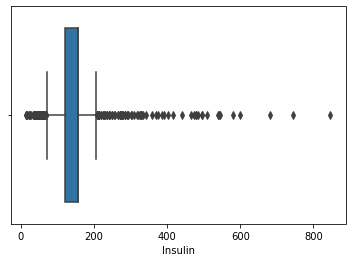

In [83]:
sns.boxplot(x=dt["Insulin"])

<AxesSubplot:xlabel='BMI'>

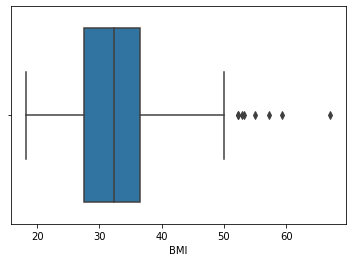

In [84]:
sns.boxplot(x=dt["BMI"])

<AxesSubplot:xlabel='Pregnancies'>

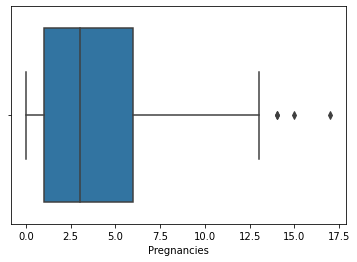

In [85]:
sns.boxplot(x=dt["Pregnancies"])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

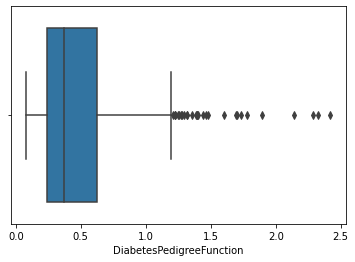

In [86]:
sns.boxplot(x=dt["DiabetesPedigreeFunction"])

<AxesSubplot:xlabel='Age'>

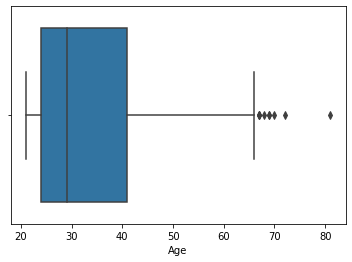

In [87]:
sns.boxplot(x=dt["Age"])

In [88]:
clf = LocalOutlierFactor(n_neighbors=5)
clf

LocalOutlierFactor(n_neighbors=5)

In [89]:
pred = clf.fit_predict(dt)

In [90]:
dt[pred == -1] # outliers

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
4,137.000000,40.0,35.00000,168.000000,43.1,0,2.288,33,1
13,189.000000,60.0,23.00000,846.000000,30.1,1,0.398,59,1
18,103.000000,30.0,38.00000,83.000000,43.3,1,0.183,33,0
27,97.000000,66.0,15.00000,140.000000,23.2,1,0.487,22,0
33,92.000000,92.0,29.15342,155.548223,19.9,6,0.188,28,0
55,73.000000,50.0,10.00000,155.548223,23.0,1,0.248,21,0
62,44.000000,62.0,29.15342,155.548223,25.0,5,0.587,36,0
106,96.000000,122.0,29.15342,155.548223,22.4,1,0.207,27,0
120,162.000000,76.0,56.00000,100.000000,53.2,0,0.759,25,1
125,88.000000,30.0,42.00000,99.000000,55.0,1,0.496,26,1


In [91]:
lsdt = dt[pred == 1]
lsdt                          # non-outliers factor

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
0,148.0,72.0,35.00000,155.548223,33.6,6,0.627,50,1
1,85.0,66.0,29.00000,155.548223,26.6,1,0.351,31,0
2,183.0,64.0,29.15342,155.548223,23.3,8,0.672,32,1
3,89.0,66.0,23.00000,94.000000,28.1,1,0.167,21,0
5,116.0,74.0,29.15342,155.548223,25.6,5,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,101.0,76.0,48.00000,180.000000,32.9,10,0.171,63,0
764,122.0,70.0,27.00000,155.548223,36.8,2,0.340,27,0
765,121.0,72.0,23.00000,112.000000,26.2,5,0.245,30,0
766,126.0,60.0,29.15342,155.548223,30.1,1,0.349,47,1


# 6

In [92]:
lsdt.corr().nlargest(5,"Outcome")

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,DiabetesPedigreeFunction,Age,Outcome
Outcome,0.495947,0.170578,0.196307,0.240720,0.290317,0.231316,0.172548,0.257913,1.000000
Glucose,1.000000,0.233230,0.158550,0.422511,0.220099,0.137980,0.110882,0.281878,0.495947
BMI,0.220099,0.304672,0.545373,0.185125,1.000000,0.041319,0.133645,0.052050,0.290317
Age,0.281878,0.362898,0.114228,0.142529,0.052050,0.558981,0.033078,1.000000,0.257913
Insulin,0.422511,0.073102,0.194034,1.000000,0.185125,0.078913,0.074294,0.142529,0.240720


In [93]:
lsdt.corr().nlargest(5,"Outcome").index

Index(['Outcome', 'Glucose', 'BMI', 'Age', 'Insulin'], dtype='object')

In [94]:
lstdt=lsdt.drop(["DiabetesPedigreeFunction","Pregnancies","SkinThickness","BloodPressure"],axis=1)
lstdt

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,155.548223,33.6,50,1
1,85.0,155.548223,26.6,31,0
2,183.0,155.548223,23.3,32,1
3,89.0,94.000000,28.1,21,0
5,116.0,155.548223,25.6,30,0
...,...,...,...,...,...
763,101.0,180.000000,32.9,63,0
764,122.0,155.548223,36.8,27,0
765,121.0,112.000000,26.2,30,0
766,126.0,155.548223,30.1,47,1


# 7

In [95]:
x = lstdt.drop(["Outcome"] , axis=1)
y = lstdt["Outcome"]

In [96]:
x.head(5)

,Glucose,Insulin,BMI,Age
0,148.0,155.548223,33.6,50
1,85.0,155.548223,26.6,31
2,183.0,155.548223,23.3,32
3,89.0,94.000000,28.1,21
5,116.0,155.548223,25.6,30


In [97]:
y.head(5)

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [98]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.7,shuffle=True,random_state=45)

# 8

In [99]:
loj_model = LogisticRegression(solver="liblinear").fit(x_train,y_train)
y_pred = loj_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.759090909090909

In [100]:
cross_val_score(loj_model , x_test , y_test , cv=10).mean()

0.7954545454545455

----------------------------------------------------------------------------------------------------

In [101]:
knn_model = KNeighborsClassifier().fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.740909090909091

In [102]:
cross_val_score(knn_model , x_test , y_test , cv=10).mean()

0.790909090909091

-----------------------------------------------------------------------------------------------------

In [103]:
svm_model = SVC(kernel="linear").fit(x_train,y_train)
y_pred = svm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7818181818181819

In [104]:
cross_val_score(svm_model , x_test , y_test , cv=10).mean()

0.7909090909090909

-----------------------------------------------------------------------------------------------------

In [105]:
cart_model = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = cart_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.6818181818181818

In [106]:
cross_val_score(cart_model , x_test , y_test , cv=10).mean()

0.7499999999999999

-----------------------------------------------------------------------------------------------------

In [107]:
rf_model = RandomForestClassifier().fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.740909090909091

In [108]:
cross_val_score(rf_model , x_test , y_test , cv=10).mean()

0.759090909090909

---------------------------------------------------------------------------------------------------

In [109]:
gbm_model = GradientBoostingClassifier().fit(x_train,y_train)
y_pred = gbm_model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7318181818181818

In [110]:
cross_val_score(gbm_model , x_test , y_test , cv=10).mean()

0.7681818181818182